In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 패키지

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import mean_absolute_error
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## 데이터

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/3차프로젝트/3.라벨링/df_tj.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,No,CARPAL,TMCP,MMCP,LMCP,IP,MPIP,LPIP,img_path,gender,BA_mean
0,1,"['0.424167', '0.76', '0.468333', '0.325']","['0.769167', '0.5175', '0.115', '0.095']","['0.399167', '0.38875', '0.105', '0.1225']","['0.16', '0.460625', '0.123333', '0.12375']","['0.865833', '0.415', '0.0883333', '0.075']","['0.428333', '0.214375', '0.106667', '0.08375']","['0.140833', '0.3225', '0.0816667', '0.0725']",/content/drive/MyDrive/project/3차project/2.저...,1,3.2
1,2,"['0.419167', '0.675', '0.441667', '0.255']","['0.75', '0.51125', '0.0966667', '0.07']","['0.435833', '0.365625', '0.108333', '0.11625']","['0.201667', '0.444375', '0.106667', '0.09625']","['0.835', '0.438125', '0.0866667', '0.06625']","['0.485833', '0.211875', '0.0916667', '0.07125']","['0.115833', '0.34625', '0.0783333', '0.055']",/content/drive/MyDrive/project/3차project/2.저...,1,1.8
2,3,"['0.520833', '0.665', '0.385', '0.245']","['0.761667', '0.474375', '0.09', '0.06625']","['0.493333', '0.36625', '0.1', '0.0975']","['0.31', '0.4525', '0.103333', '0.085']","['0.863333', '0.398125', '0.0833333', '0.06875']","['0.4875', '0.214375', '0.0883333', '0.07625']","['0.174167', '0.385625', '0.075', '0.06125']",/content/drive/MyDrive/project/3차project/2.저...,1,2.4
3,4,"['0.455', '0.72375', '0.396667', '0.275']","['0.745833', '0.53625', '0.095', '0.075']","['0.444167', '0.395', '0.105', '0.105']","['0.240833', '0.489375', '0.101667', '0.08625']","['0.851667', '0.46625', '0.09', '0.065']","['0.425', '0.229375', '0.0966667', '0.07625']","['0.145', '0.396875', '0.08', '0.05625']",/content/drive/MyDrive/project/3차project/2.저...,1,2.2
4,5,"['0.5025', '0.675', '0.421667', '0.2275']","['0.734167', '0.465625', '0.101667', '0.08625']","['0.416667', '0.388125', '0.106667', '0.10375']","['0.220833', '0.480625', '0.108333', '0.07875']","['0.819167', '0.37125', '0.095', '0.075']","['0.39', '0.21875', '0.106667', '0.0825']","['0.110833', '0.375625', '0.0883333', '0.06125']",/content/drive/MyDrive/project/3차project/2.저...,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1223,661,"['0.483333', '0.74875', '0.37', '0.23']","['0.780833', '0.561875', '0.135', '0.11625']","['0.485833', '0.41', '0.128333', '0.0975']","['0.279167', '0.48375', '0.118333', '0.0825']","['0.866667', '0.436875', '0.106667', '0.08875']","['0.473333', '0.231875', '0.113333', '0.08125']","['0.1725', '0.38', '0.0983333', '0.0625']",/content/drive/MyDrive/project/3차project/2.저...,0,16.5
1224,662,"['0.495833', '0.77', '0.398333', '0.245']","['0.7875', '0.575', '0.138333', '0.115']","['0.4525', '0.42125', '0.121667', '0.1025']","['0.230833', '0.505625', '0.131667', '0.09375']","['0.859167', '0.4475', '0.095', '0.0825']","['0.451667', '0.240625', '0.116667', '0.08625']","['0.1475', '0.38', '0.115', '0.0675']",/content/drive/MyDrive/project/3차project/2.저...,0,16.5
1225,663,"['0.4425', '0.73', '0.368333', '0.2425']","['0.754167', '0.565', '0.128333', '0.0975']","['0.4425', '0.413125', '0.101667', '0.08625']","['0.245833', '0.476875', '0.108333', '0.09375']","['0.854167', '0.4525', '0.0916667', '0.075']","['0.45', '0.2325', '0.106667', '0.075']","['0.155833', '0.3675', '0.0983333', '0.0625']",/content/drive/MyDrive/project/3차project/2.저...,0,15.9
1226,664,"['0.518333', '0.70125', '0.34', '0.2025']","['0.78', '0.530625', '0.12', '0.09375']","['0.485', '0.390625', '0.11', '0.08875']","['0.293333', '0.4775', '0.103333', '0.08']","['0.865833', '0.42', '0.101667', '0.08']","['0.459167', '0.221875', '0.108333', '0.08375']","['0.191667', '0.385625', '0.0966667', '0.06375']",/content/drive/MyDrive/project/3차project/2.저...,0,17.0


## 이미지 제너레이터

    CARPAL = [] # 0
    TMCP = [] # 1
    MMCP = [] # 2
    LMCP = [] # 3
    IP = [] # 4
    MPIP = [] # 5
    LPIP = [] # 6

CARPAL 114 478 395 738


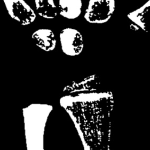

TMCP 427 375 496 451


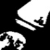

MMCP 208 262 271 360


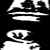

LMCP 59 319 132 418


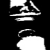

IP 492 302 545 362


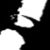

MPIP 224 138 288 205


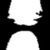

LPIP 59 229 108 287


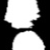

CARPAL 119 438 384 642


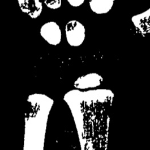

TMCP 420 381 479 437


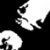

MMCP 228 246 293 339


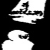

LMCP 89 317 153 394


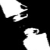

IP 474 324 527 377


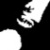

MPIP 263 141 318 198


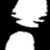

LPIP 45 255 92 299


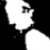

CARPAL 196 434 427 630


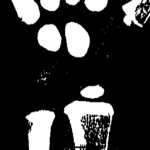

TMCP 430 353 484 406


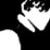

MMCP 265 254 325 332


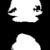

LMCP 155 328 216 396


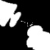

IP 492 291 542 346


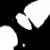

MPIP 266 141 318 202


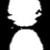

LPIP 82 284 127 333


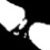

CARPAL 153 469 392 689


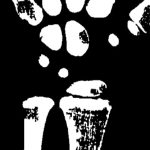

TMCP 418 399 475 459


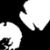

MMCP 235 274 298 358


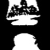

LMCP 113 357 174 426


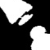

IP 484 347 538 399


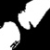

MPIP 225 153 284 214


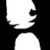

LPIP 63 295 111 340


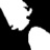

CARPAL 174 449 428 631


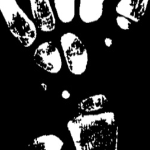

TMCP 410 338 471 407


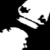

MMCP 218 269 282 352


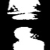

LMCP 99 353 164 416


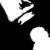

IP 463 267 520 327


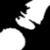

MPIP 201 142 266 208


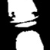

LPIP 39 276 92 325


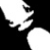

In [ ]:
from google.colab.patches import cv2_imshow as imshow

li = ['CARPAL',	'TMCP',	'MMCP',	'LMCP',	'IP',	'MPIP',	'LPIP']

for i in range(5):
  file_name = df.loc[i,'img_path']
  orgin_img = cv2.imread(file_name)

  for j in li :
    A = float(df[j][i].strip("'[]").split(',')[0].strip(" ' "))
    B = float(df[j][i].strip("'[]").split(',')[1].strip(" ' "))
    C = float(df[j][i].strip("'[]").split(',')[2].strip(" ' "))
    D = float(df[j][i].strip("'[]").split(',')[3].strip(" ' "))

    x=float(A) * 600
    y=float(B) * 800
    w=float(C) * 600
    h=float(D) * 800
  
    half_width=w/2.0
    half_height=h/2.0
  
    startX=int(x-half_width)
    startY=int(y-half_height)
    endX=int(x+half_width)
    endY=int(y+half_height)

    print(j, startX, startY, endX, endY)

    crop_img = orgin_img[startY:endY,startX:endX]
    if j == 'CARPAL' :
      crop_img = cv2.resize(crop_img, (150, 150),cv2.INTER_AREA)
    else :
      crop_img = cv2.resize(crop_img, (50, 50),cv2.INTER_AREA)
    imshow(crop_img)

In [ ]:
def generator(df,model,n):
  gender = np.array(df.gender)
  age = np.array(df.BA_mean)

  CARPAL_img = [] # 0 : 손목
  TMCP_img = [] # 1 : 엄지 아래
  MMCP_img = [] # 2 : 중지 아래
  LMCP_img = [] # 3 : 새끼 아래
  IP_img = []   # 4 : 엄지 위
  MPIP_img = [] # 5 : 중지 위
  LPIP_img = [] # 6 : 새끼 위

  bimg_in = [] # 원본
  gender_in = []
  age_in = []

  error_list = []

  li = ['CARPAL',	'TMCP',	'MMCP',	'LMCP',	'IP',	'MPIP',	'LPIP']

  for i in range(len(df)):
    # 원본 이미지 경로 가져오기
    file_name = df.loc[i,'img_path']
    # 원본 이미지 읽어오기
    orgin_img = cv2.imread(file_name)
    
    for j in li :
      A = float(df[j][i].strip("'[]").split(',')[0].strip(" ' "))
      B = float(df[j][i].strip("'[]").split(',')[1].strip(" ' "))
      C = float(df[j][i].strip("'[]").split(',')[2].strip(" ' "))
      D = float(df[j][i].strip("'[]").split(',')[3].strip(" ' "))

      x=float(A) * 600
      y=float(B) * 800
      w=float(C) * 600
      h=float(D) * 800
  
      half_width=w/2.0
      half_height=h/2.0
  
      startX=int(x-half_width)
      startY=int(y-half_height)
      endX=int(x+half_width)
      endY=int(y+half_height)

      crop_img = orgin_img[startY:endY,startX:endX]

      if j == 'CARPAL' :
        img_CARPAL = cv2.resize(crop_img, (150, 150),cv2.INTER_AREA)
      elif j == 'TMCP' :
        img_TMCP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      elif j == 'MMCP' :
        img_MMCP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      elif j == 'LMCP' :
        img_LMCP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      elif j == 'IP' :
        img_IP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      elif j == 'MPIP' :
        img_MPIP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      elif j == "LPIP" :
        img_LPIP = cv2.resize(crop_img, (50, 50), cv2.INTER_AREA)
      else :
        continue

    # 원본 이미지
    img = cv2.resize(orgin_img, (224, 224),cv2.INTER_AREA)
    bimg_in.append(img)
    # crop img
    CARPAL_img.append(img_CARPAL)
    TMCP_img.append(img_TMCP)
    MMCP_img.append(img_MMCP)
    LMCP_img.append(img_LMCP)
    IP_img.append(img_IP)
    MPIP_img.append(img_MPIP)
    LPIP_img.append(img_LPIP)
    # 성별, 나이
    gender_in.append(gender[i])
    age_in.append(age[i])
  
  # np.array
  # 원본 이미지
  bimg_in = np.array(bimg_in)
  # crop 이미지
  CARPAL_img = np.array(CARPAL_img)
  TMCP_img = np.array(TMCP_img)
  MMCP_img = np.array(MMCP_img)
  LMCP_img = np.array(LMCP_img)
  IP_img = np.array(IP_img)
  MPIP_img = np.array(MPIP_img)
  LPIP_img = np.array(LPIP_img)
  # 성별, 나이
  gender_in = np.array(gender_in)
  age_in = np.array(age_in)
        
  # if n==1:
  #     return img_in,age_in
      
  # if n==2:
  #     return [gender_in,wrist_in,middle_in,thumb_in,little_in],age_in
        
  if n==3:
    return [bimg_in, CARPAL_img, TMCP_img, MMCP_img, LMCP_img, IP_img, MPIP_img, LPIP_img, gender_in],age_in

## 데이터 파편화 줄이기 gpu 할당

In [ ]:
from tensorflow.compat.v1 import ConfigProto,InteractiveSession

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

print(os.popen('nvidia-smi').read())

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.




## TJNet 모델 생성

In [ ]:
def tjnet(bimg_size = 224):
    
    #원본이미지 모델 (mobilnet)
    mob_model = tf.keras.applications.MobileNet(input_shape = (bimg_size, bimg_size, 3),
                                                   include_top = False,
                                                   weights = 'imagenet')
    mob_model.trainable = True
    model_2 = Sequential()
    model_2.add(mob_model)
    model_2.add(GlobalAveragePooling2D())
    model_2.add(Dense(2048, activation = 'selu'))

    # ------------------------------------------------------------------------------------------------
    # 손목roi 모델 (tj-net)
    CARPAL_input = Input(shape = (150, 150, 3))
    i_output = block(CARPAL_input)
    CARPAL_model = Model(inputs = CARPAL_input, outputs = i_output)
    
    # ------------------------------------------------------------------------------------------------

    # 엄지 아래 roi 모델 (tj-net)
    TMCP_input = Input(shape = (50, 50, 3))
    i_output1 = block(TMCP_input)
    TMCP_model = Model(inputs = TMCP_input, outputs = i_output1)

    # ------------------------------------------------------------------------------------------------
    # 중지 아래 roi 모델 (tj-net)

    MMCP_input = Input(shape = (50, 50, 3))
    i_output2 = block(MMCP_input)
    MMCP_model = Model(inputs = MMCP_input, outputs = i_output2)

    # ------------------------------------------------------------------------------------------------
    # 새끼 아래 roi 모델 (tj-net)

    LMCP_input = Input(shape = (50, 50, 3))
    i_output3 = block(LMCP_input)
    LMCP_model = Model(inputs = LMCP_input, outputs = i_output3)


    # ------------------------------------------------------------------------------------------------
    # 엄지 위 roi 모델 (tj-net)

    IP_input = Input(shape = (50, 50, 3))
    i_output4 = block(IP_input)
    IP_model = Model(inputs = IP_input, outputs = i_output4)


    # ------------------------------------------------------------------------------------------------
    # 중지 위 roi 모델 (tj-net)

    MPIP_input = Input(shape = (50, 50, 3))
    i_output5 = block(MPIP_input)
    MPIP_model = Model(inputs = MPIP_input, outputs = i_output5)

    # ------------------------------------------------------------------------------------------------
    # 새끼 위 roi 모델 (tj-net)

    LPIP_input = Input(shape = (50, 50, 3))
    i_output6 = block(LPIP_input)
    LPIP_model = Model(inputs = LPIP_input, outputs = i_output6)

    # ------------------------------------------------------------------------------------------------
    # gender 모델
    g_model = gender()

    #concat및 마무리
    con1 = concatenate([model_2.output, CARPAL_model.output, TMCP_model.output, MMCP_model.output, LMCP_model.output, IP_model.output, MPIP_model.output, LPIP_model.output])
    dense1 = ReLU()(Dense(2048)(con1))
    con2 = concatenate([dense1,g_model.output])
    dense2 = ReLU()(Dense(1024)(con2))
    dense3 = ReLU()(Dense(512)(dense2))
    model_out = Dense(1,activation = "linear")(dense3)

    model = Model([model_2.input, CARPAL_model.input, TMCP_model.input, MMCP_model.input,LMCP_model.input, IP_model.input, MPIP_model.input, LPIP_model.input, g_model.input],model_out)

    return model

def block(input) :
    #block 1
    conv1 = ReLU()(Conv2D(32,3)(input))
    conv2 = ReLU()(Conv2D(32,3)(conv1))
    conv3 = ReLU()(Conv2D(64,3,padding='same')(conv2))
    x = Conv2D(64,1)(conv3)
    x = BatchNormalization()(x)

    se = GlobalAveragePooling2D()(x)
    se = Dense(4,activation="swish")(se)
    se = Dense(64,activation="swish")(se)
    se = Reshape([1,1,64])(se)
    x = Multiply()([conv3,se])

    short = Conv2D(64,(1,1))(conv2)
    short = BatchNormalization()(short)

    x = ReLU()(add([x,short]))

    pool1 = MaxPool2D(pool_size=(2,2))(x)
    #block 2
    conv4 = ReLU()(Conv2D(60,1)(pool1))
    conv5 = ReLU()(Conv2D(192,3)(conv4))
    pool2 = MaxPool2D(pool_size=(2,2))(conv5)
    #block 3
    conv6 = ReLU()(Conv2D(512,3)(pool2))
    pool3 = MaxPool2D(pool_size=(2,2))(conv6)
    #block 4
    conv7 = ReLU()(Conv2D(1024,3,padding='same')(pool3))
    pool4 = MaxPool2D(pool_size=(2,2))(conv7)
    i_output = Flatten()(pool4)

    return i_output
    
def gender(act='swish'):
    g_input = Input(shape = (1,))
    g_output = Dense(64,activation = act)(g_input)
    
    g_model = Model(inputs = g_input,outputs = g_output)
    return g_model

In [ ]:
model = tjnet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 input_5 (InputLayer)      

In [ ]:
model.compile(loss ='mse', optimizer= 'nadam', metrics = 'mean_absolute_error' )

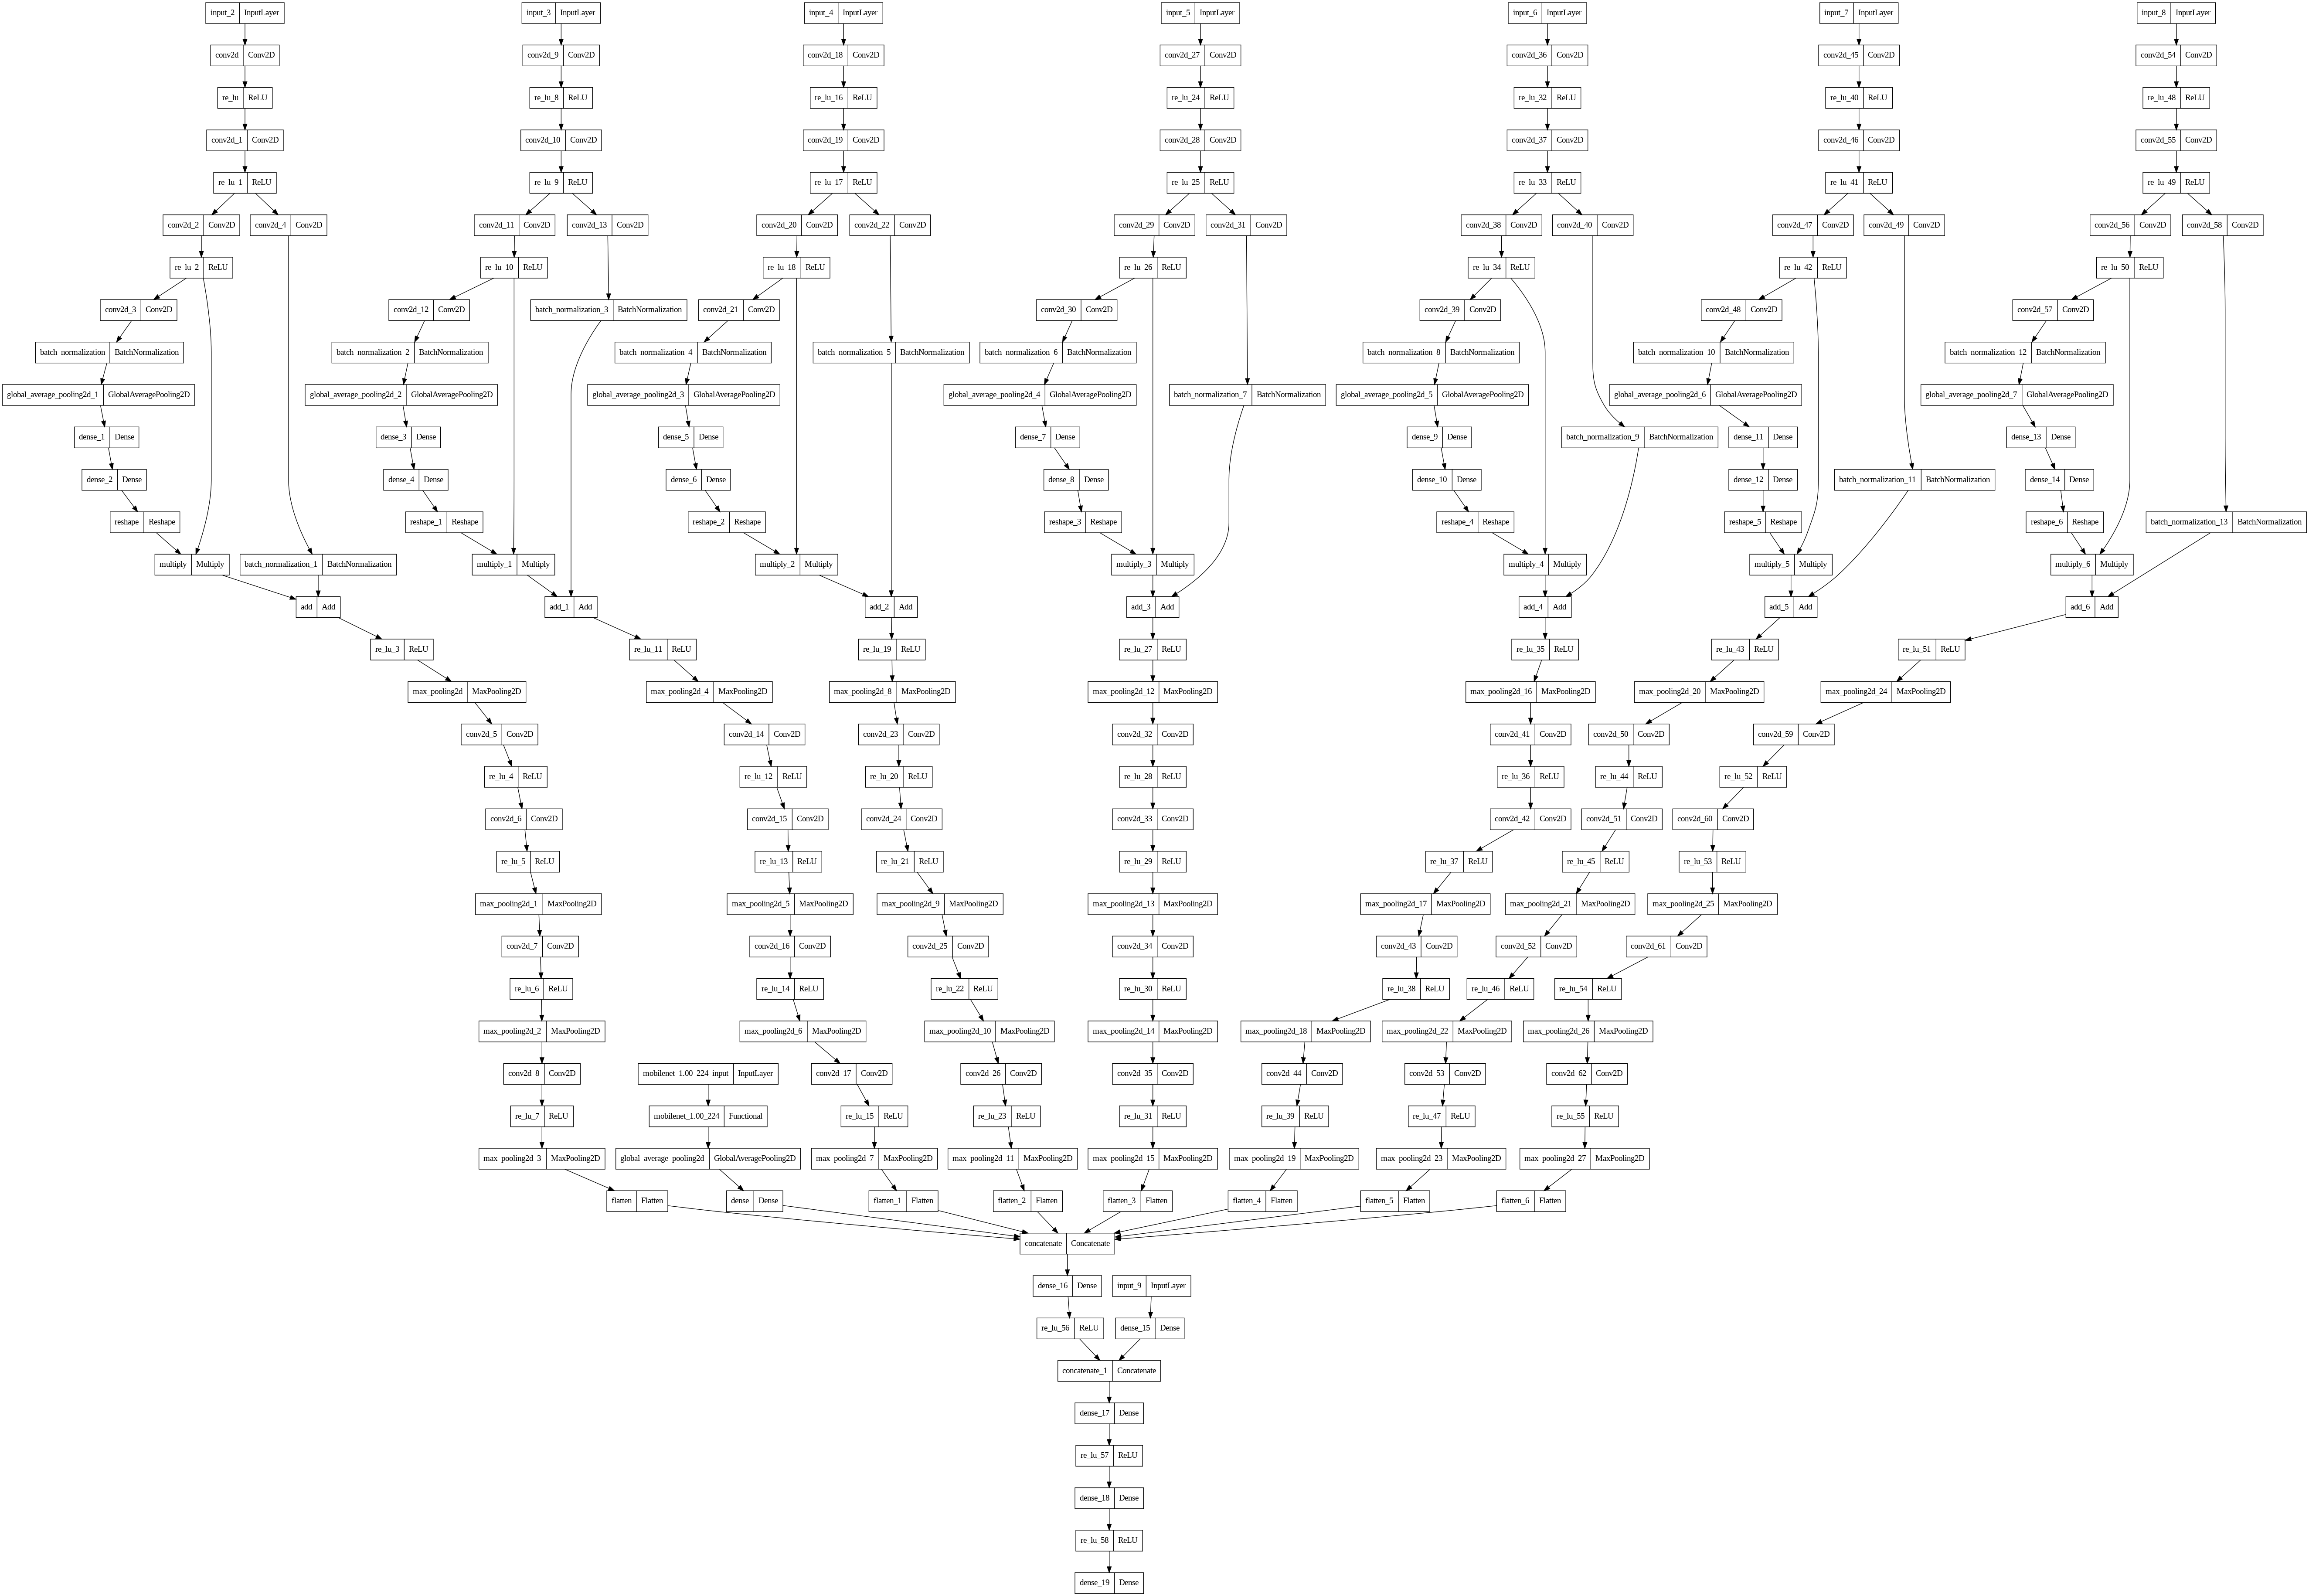

In [ ]:
plot_model(model)

## train_val_set 만들기

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size = 0.2, random_state = 0)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

train_X,train_y = generator(train_df, model, 3)
val_X,val_y = generator(val_df, model, 3)

In [ ]:
len(train_df), len(val_df)

(982, 246)

In [ ]:
len(train_y),len(val_y)

(982, 246)

## 초반 loss 제거

In [ ]:
# model.load_weights("temp/"+model_weight)
model.fit(train_X,train_y, validation_data = (val_X, val_y), epochs = 1)

31/31 [==============================] - 99s 696ms/step - loss: 1766.9382 - mean_squared_error: 1766.9382 - val_loss: 140.0714 - val_mean_squared_error: 140.0714


## 모델학습

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=30,
                               verbose=0,
                               mode='auto')

rLR = ReduceLROnPlateau(monitor='val_loss',  # 검증 손실을 기준으로 callback이 호출됩니다
                        factor=0.5,          # callback 호출시 학습률을 1/2로 줄입니다
                        patience=10,         # epoch 10 동안 개선되지 않으면 callback이 호출됩니다
)

callbacks = [early_stopping,rLR]

history = model.fit(train_X,train_y,
                    validation_data = (val_X,val_y),
                    epochs = 50,
                    callbacks= callbacks)

Epoch 1/50
31/31 [==============================] - 16s 500ms/step - loss: 1.6328 - mean_squared_error: 1.6328 - val_loss: 43.1219 - val_mean_squared_error: 43.1219 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 16s 502ms/step - loss: 1.0877 - mean_squared_error: 1.0877 - val_loss: 27.9068 - val_mean_squared_error: 27.9068 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 16s 508ms/step - loss: 0.8342 - mean_squared_error: 0.8342 - val_loss: 18.1892 - val_mean_squared_error: 18.1892 - lr: 0.0010
Epoch 4/50
31/31 [==============================] - 15s 492ms/step - loss: 0.5588 - mean_squared_error: 0.5588 - val_loss: 6.7974 - val_mean_squared_error: 6.7974 - lr: 0.0010
Epoch 5/50
31/31 [==============================] - 15s 493ms/step - loss: 0.5426 - mean_squared_error: 0.5426 - val_loss: 3.4699 - val_mean_squared_error: 3.4699 - lr: 0.0010
Epoch 6/50
31/31 [==============================] - 15s 499ms/step - loss: 0.4909 - mean_squared_error: 0.4909 - v

## 평가

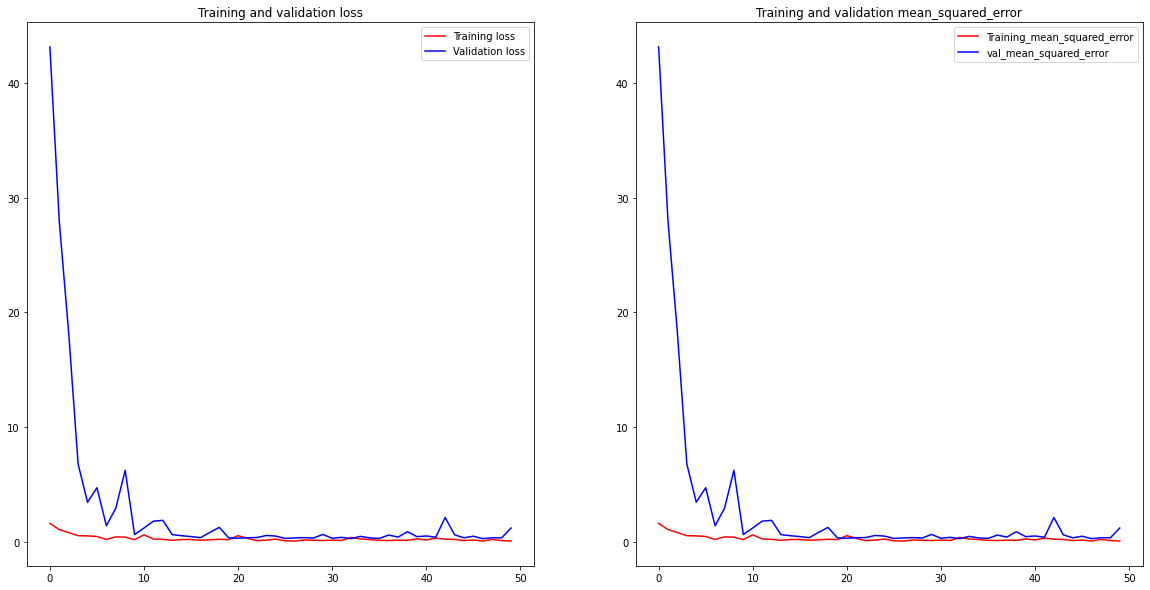

In [ ]:
# train 검증의 손실과 정확도 시각화
history = history.history

loss = history['loss']
val_loss = history['val_loss']
mean_squared_error = history['mean_squared_error']
val_mean_squared_error = history['val_mean_squared_error']

epochs = range(len(loss))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs = axs.flatten()

axs[0].plot(epochs, loss, 'r', label='Training loss')
axs[0].plot(epochs, val_loss, 'b', label='Validation loss')
axs[0].set_title('Training and validation loss')
axs[0].legend(loc=0)

axs[1].plot(epochs, mean_squared_error, 'r', label='Training_mean_squared_error')
axs[1].plot(epochs, val_mean_squared_error, 'b', label='val_mean_squared_error')
axs[1].set_title('Training and validation mean_squared_error')
axs[1].legend(loc=0)

In [ ]:
mse, mae = model.evaluate(val_X,val_y)
print(f"mae : {mae}, mse : {mse}" )

In [ ]:
pred1 = model.predict(train_X)
pred2 = model.predict(val_X)

In [ ]:
train_df['BA_pred'] = pred1
val_df['BA_pred'] = pred2

df_final = pd.concat([train_df,val_df])
df_final.sort_values(['gender','No'],ignore_index=True, inplace=True)

In [ ]:
df_final.to_csv('/content/drive/MyDrive/3차프로젝트/4.모델링_골연령예측/df_final.csv',index=False)